# __STTN327 Python Project 2024: Predicting Athlete Performance in Long-Distance Running__

# _Phase 1_
### ___Descriptive Statistics & Graphs___
___


In [14]:
#Import necessary libraries for data analysis and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

___
__Data Preparation__

In [4]:
df = pd.read_csv('sport_perform.csv')

In [5]:
#Filter the dataset to include only rows related to long-distance running
df_long_dist = df[df['sport'] == 'Long-distance running']

In [5]:
#Print the total number of missing values in df_long_dist
print(df_long_dist.isnull().sum().sum())

0


In [6]:
df_long_dist.head()

,Unnamed: 0,perform,type,sport,gender,x01,x02,x03,x04,x05,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
600,601,81,4,Long-distance running,Female,53,36,40,57,40,...,51,38,53,51,53,34,48,37,50,31
601,602,79,4,Long-distance running,Female,26,33,57,48,49,...,43,36,37,51,45,47,37,33,29,23
602,603,80,4,Long-distance running,Female,47,44,37,55,47,...,42,46,46,46,44,40,33,45,45,20
603,604,66,4,Long-distance running,Female,48,41,40,40,29,...,38,43,48,33,40,39,52,40,38,39
604,605,56,4,Long-distance running,Female,38,29,48,41,49,...,41,31,37,31,43,40,38,33,44,32


___
__Creating Set 1 and Set 2__

In [7]:
#Drop unnecessary the following columns for Set 1
#'Unnamed: 0', 'type', and 'sport'
df_set_1 = df_long_dist.drop(['Unnamed: 0', 'type', 'sport', 'gender'], axis = 1)

In [8]:
df_set_1.head()

,perform,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
600,81,53,36,40,57,40,20,48,40,37,...,51,38,53,51,53,34,48,37,50,31
601,79,26,33,57,48,49,22,35,34,45,...,43,36,37,51,45,47,37,33,29,23
602,80,47,44,37,55,47,23,39,45,47,...,42,46,46,46,44,40,33,45,45,20
603,66,48,41,40,40,29,22,54,44,36,...,38,43,48,33,40,39,52,40,38,39
604,56,38,29,48,41,49,22,38,32,56,...,41,31,37,31,43,40,38,33,44,32


In [9]:
#Drop unnecessary the following columns for Set 2
#'Unnamed: 0', 'type', and 'sport'
df_set_2 = df_long_dist.drop(['Unnamed: 0', 'type', 'sport'], axis=1)

In [10]:
df_set_2.head()

,perform,gender,x01,x02,x03,x04,x05,x06,x07,x08,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
600,81,Female,53,36,40,57,40,20,48,40,...,51,38,53,51,53,34,48,37,50,31
601,79,Female,26,33,57,48,49,22,35,34,...,43,36,37,51,45,47,37,33,29,23
602,80,Female,47,44,37,55,47,23,39,45,...,42,46,46,46,44,40,33,45,45,20
603,66,Female,48,41,40,40,29,22,54,44,...,38,43,48,33,40,39,52,40,38,39
604,56,Female,38,29,48,41,49,22,38,32,...,41,31,37,31,43,40,38,33,44,32


___
__Correlation Analysis__

In [11]:
#Generate the correlation matrix to identify relationships between variables
set_1_correlations = df_set_1.corr()

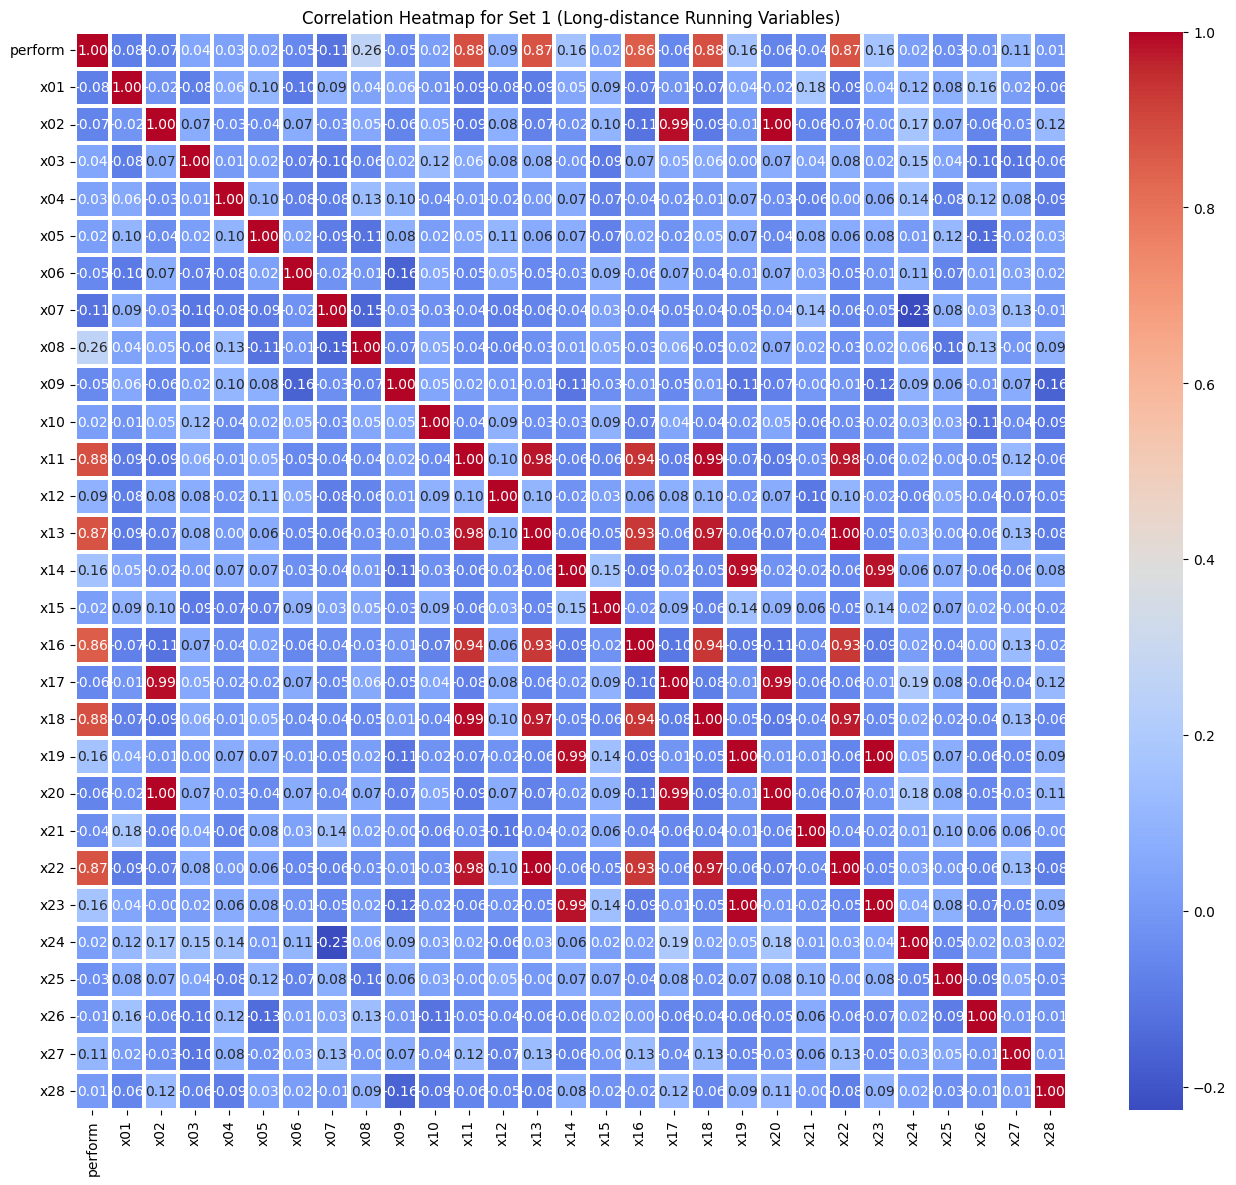

In [12]:
#Visualize the correlation matrix using a heatmap to identify strongly correlated variables
plt.figure(figsize=(16, 14))
sns.heatmap(set_1_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.5)
plt.title('Correlation Heatmap for Set 1 (Long-distance Running Variables)')
plt.show()

Based on the correlation analysis, the following variables were identified as significantly correlated:

x13 (Fitness), x18 (Maximal Oxygen Uptake), x16 (Lactate Threshold), and x11 (Endurance). 

But there are extremely high correlations between all the variables.


___
__Outlier Detection Boxplot, Violin Plot, Performance vs Fitness Scatter Plot, Boxen Plot, Histograms of Key Variables__


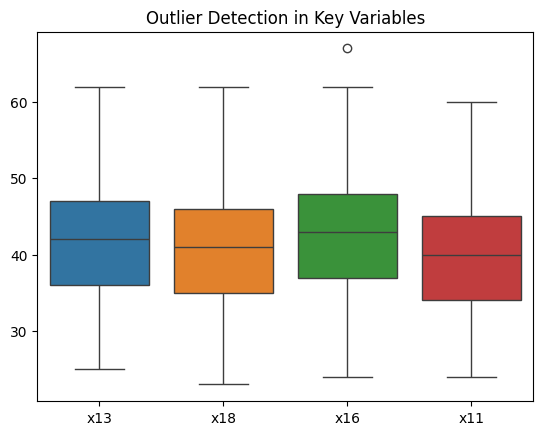

In [14]:
# Checking for outliers with a boxplot
sns.boxplot(data=df_long_dist[['x13', 'x18', 'x16', 'x11']])
plt.title('Outlier Detection in Key Variables')
plt.show()


The boxplot shows the distribution of four key variables: Fitness (x13), Maximal Oxygen Uptake (x18), Lactate Threshold (x16), and Endurance (x11). 

There is one outlier in the Lactate Threshold (x16). The boxplot suggests that most of the values for these variables are normally distributed with no extreme outliers except for one in x16.


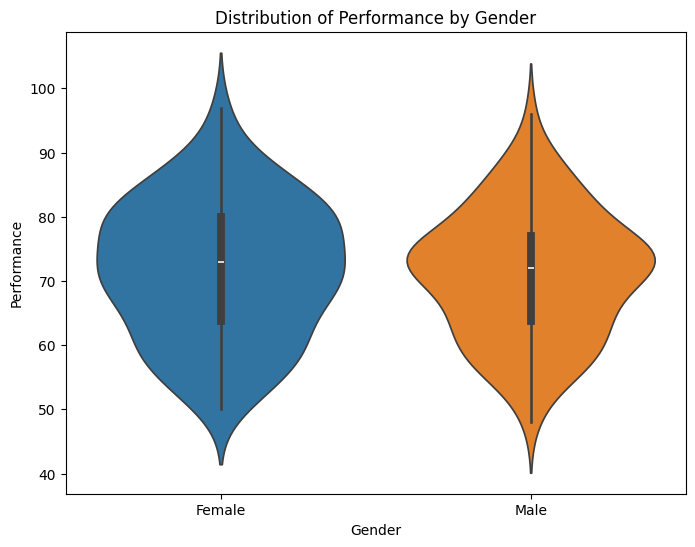

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='perform', data=df_long_dist, hue='gender')
plt.title('Distribution of Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Performance')
plt.show()


This violin plot shows the distribution of performance for males and females. Both genders have a similar range of performance values, though females seem to have slightly higher variability. The median performance appears higher for males.


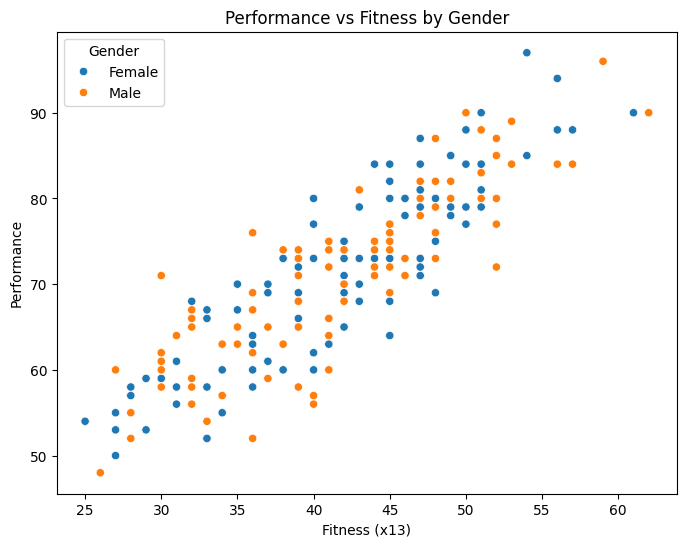

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x13', y='perform', hue='gender', data=df_long_dist)
plt.title('Performance vs Fitness by Gender')
plt.xlabel('Fitness (x13)')
plt.ylabel('Performance')
plt.legend(title='Gender')
plt.show()


This scatter plot shows the relationship between Fitness (x13) and Performance. A clear positive correlation exists between fitness and performance for both genders. Males and females are distributed fairly evenly in the scatter, indicating similar fitness-performance relationships.


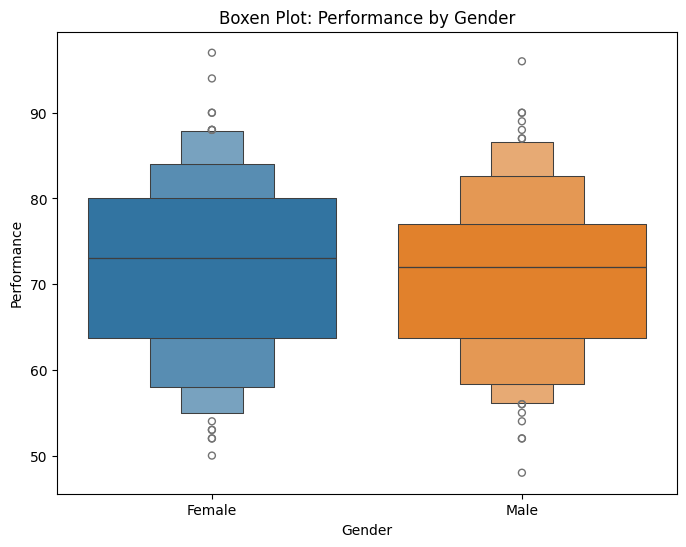

In [17]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='gender', y='perform', data=df_long_dist, hue='gender')
plt.title('Boxen Plot: Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Performance')
plt.show()


This boxen plot shows the distribution of performance by gender. There is a more detailed display of outliers in both groups, with females having more outliers towards the higher performance end. The median performance is slightly higher for females, though both distributions are fairly similar.


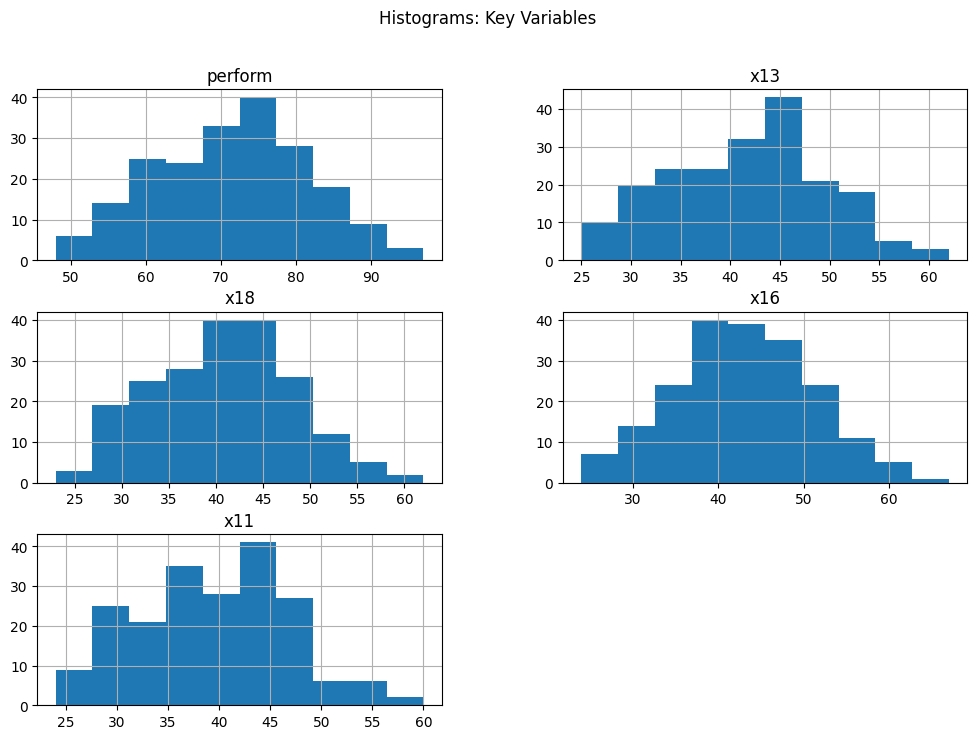

In [18]:
df_long_dist[['perform', 'x13', 'x18', 'x16', 'x11']].hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms: Key Variables')
plt.show()


The histograms provide a clear view of the distribution of key variables: Performance (perform), Fitness (x13), Maximal Oxygen Uptake (x18), Lactate Threshold (x16), and Endurance (x11). Most variables appear to follow a roughly normal distribution. We will have a closer look at Endurance (x11).


___
__Distribution of Endurance, Fitness vs Maximal Oxygen Uptake Scatter Plot__

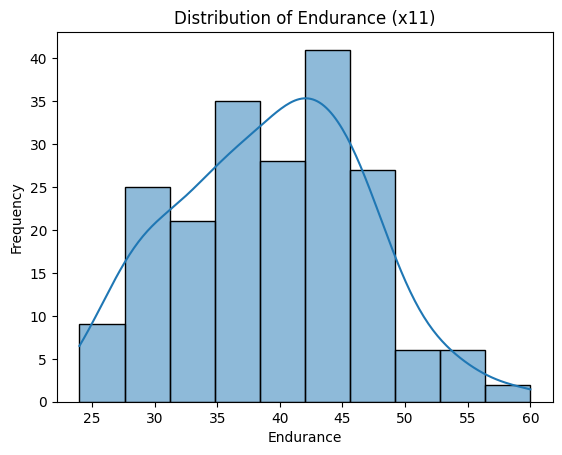

In [19]:
sns.histplot(df_set_1['x11'], kde=True)
plt.title('Distribution of Endurance (x11)')
plt.xlabel('Endurance')
plt.ylabel('Frequency')
plt.show()


The histogram reveals that Endurance (x11) is approximately normally distributed, with most of the values clustered between 35 and 50. The peak of the distribution is around 40-45, suggesting that most long-distance runners have endurance scores in this range. There is a slight right skew, as the tail extends towards higher endurance values (50-60).


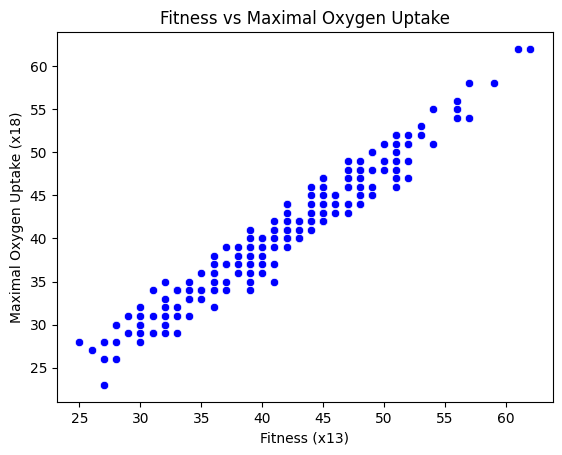

In [20]:
sns.scatterplot(x='x13', y='x18', data=df_set_1, color = 'blue')
plt.title('Fitness vs Maximal Oxygen Uptake')
plt.xlabel('Fitness (x13)')
plt.ylabel('Maximal Oxygen Uptake (x18)')
plt.show()



This scatter plot shows a strong positive correlation between Fitness (x13) and Maximal Oxygen Uptake (x18). As fitness increases, maximal oxygen uptake increases almost linearly, which makes physiological sense for athletes.


___
__Summary Statistics__

In [21]:
df_set_1[['perform', 'x13', 'x18', 'x16', 'x11']].describe().T


,count,mean,std,min,25%,50%,75%,max
perform,200.0,71.385,10.291567,48.0,63.75,72.0,79.0,97.0
x13,200.0,41.715,7.710449,25.0,36.00,42.0,47.0,62.0
x18,200.0,40.770,7.543315,23.0,35.00,41.0,46.0,62.0
x16,200.0,42.920,8.129208,24.0,37.00,43.0,48.0,67.0
x11,200.0,39.325,7.436118,24.0,34.00,40.0,45.0,60.0


___

# _Phase 2_
### ___Hypothesis Testing___
___

In [22]:
from scipy.stats import chi2_contingency

___
__Creation of Categorical Variables__

In [23]:
bins = [0, 50, 75, 100]
labels = ['Low', 'Medium', 'High']

In [24]:
df_long_dist.loc[:, 'perform_cat'] = pd.cut(df_long_dist['perform'], bins=bins, labels=labels)
df_long_dist.loc[:, 'x23_cat'] = pd.cut(df_long_dist['x23'], bins=bins, labels=labels)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7372\2579241735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_dist.loc[:, 'perform_cat'] = pd.cut(df_long_dist['perform'], bins=bins, labels=labels)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7372\2579241735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_dist.loc[:, 'x23_cat'] = pd.cut(df_long_dist['x23'], bins=bins, labels=labels)


In [25]:
contingency_table = pd.crosstab(df_long_dist['perform_cat'], df_long_dist['x23_cat'])

___
__Testing the Dependence of Performance on Psychological Factors (x23) [Chi-Square Test] & Contingency Table Heatmap & Box Plot__

H0: Assess if psychological factors (x23) significantly impact performance (perform).

H1: Assess if gender influences performance in long-distance running.

In [26]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-Squared Test Statistic: 2.1867398593123393
P-value: 0.33508537473982875
Degrees of Freedom: 2
Expected frequencies:
 [[  1.59   0.41]
 [101.76  26.24]
 [ 55.65  14.35]]


In [27]:
if p_val < 0.05:
    print("Reject the null hypothesis. Psychological factors significantly affect performance.")
else:
    print("Fail to reject the null hypothesis. No significant effect of psychological factors on performance.")

Fail to reject the null hypothesis. No significant effect of psychological factors on performance.


This means psychological factors (x23) do not significantly affect performance based on this dataset.


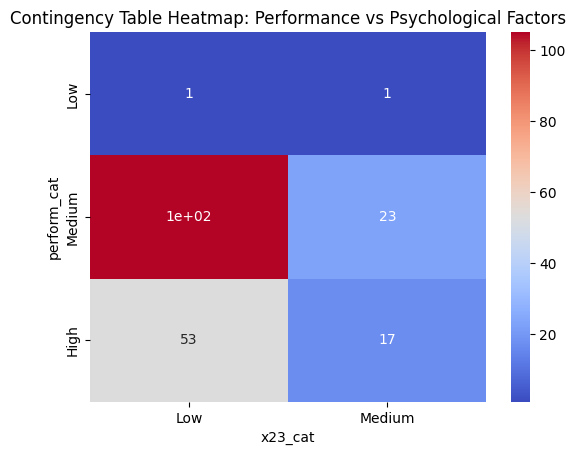

In [28]:
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', cbar=True)
plt.title('Contingency Table Heatmap: Performance vs Psychological Factors')
plt.show()


The heatmap shows the distribution of athletes’ performance categories (Low, Medium, High) in relation to psychological factors (x23) categorized into Low and Medium. Most of the athletes fall into the Medium performance category, with a higher proportion associated with Low psychological factors.


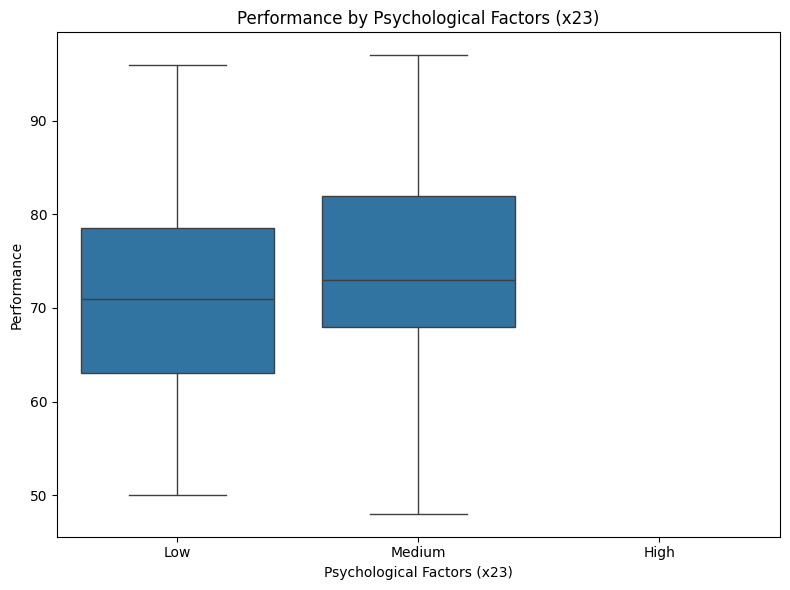

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='x23_cat', y='perform', data=df_long_dist)
plt.title('Performance by Psychological Factors (x23)')
plt.xlabel('Psychological Factors (x23)')
plt.ylabel('Performance')
plt.tight_layout()

In [30]:
from scipy.stats import shapiro

___

__Test for Normality__

H0: The data is normally distributed.

H1: The data is not normally distributed.


In [31]:
stat, p_val = shapiro(df_long_dist['perform'])
print('Shapiro-Wilk Test for Performance: p-value =', p_val)

Shapiro-Wilk Test for Performance: p-value = 0.11582829861036875


The p-value is greater than 0.05, meaning we fail to reject the null hypothesis. This indicates that the performance variable follows a normal distribution.


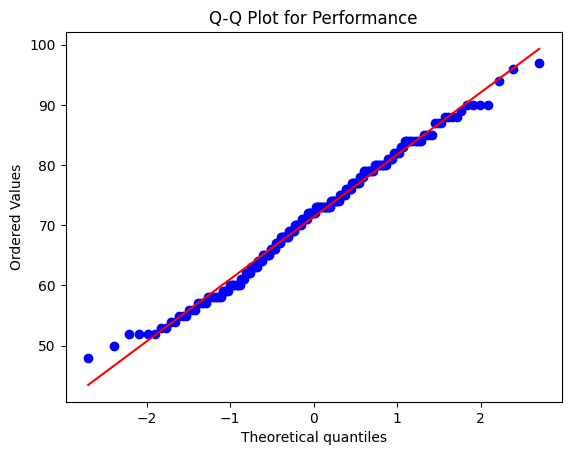

In [32]:
import scipy.stats as stats

stats.probplot(df_long_dist['perform'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Performance')
plt.show()

The points generally fall along the red 45 degree line, which suggests that the performance data follows a normal distribution.


In [33]:
from scipy.stats import levene

___
__Test for Equal Variances__

H0: The variances of the groups are equal.

H1: The variances of the groups are not equal.

In [34]:
stat, p_val = levene(df_long_dist[df_long_dist['gender'] == 'Male']['perform'],
                     df_long_dist[df_long_dist['gender'] == 'Female']['perform'])
print('Levene’s Test for Equality of Variances: p-value =', p_val)

Levene’s Test for Equality of Variances: p-value = 0.26892322646401423


Since the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the variances between male and female performance are equal.

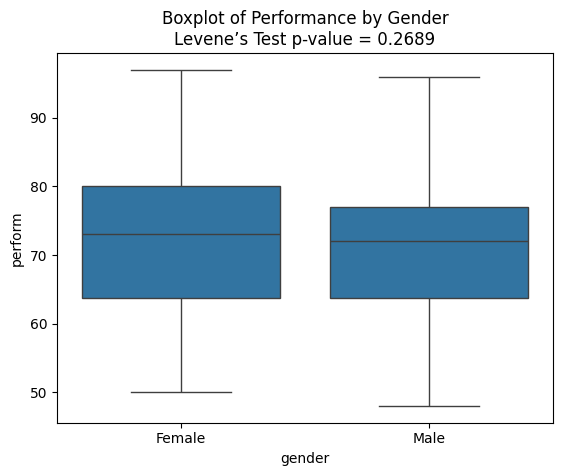

In [35]:
sns.boxplot(x='gender', y='perform', data=df_long_dist)
plt.title(f'Boxplot of Performance by Gender\nLevene’s Test p-value = {p_val:.4f}')
plt.show()

Both groups seem to have a similar spread of performance scores, with the median values fairly close to each other.


In [36]:
from scipy.stats import ttest_ind

___
__Testing the Effect of Gender on Performance__

H0: There is no difference in performance between male and female athletes.

H1: There is a significant difference in performance between male and female athletes.

In [37]:
male_perform = df_long_dist[df_long_dist['gender'] == 'Male']['perform']
female_perform = df_long_dist[df_long_dist['gender'] == 'Female']['perform']

In [38]:
t_stat, p_val = ttest_ind(male_perform, female_perform, equal_var=True)
print('T-Test for Gender Differences in Performance: p-value =', p_val)

T-Test for Gender Differences in Performance: p-value = 0.6464321861497453


In [39]:
if p_val < 0.05:
    print("Reject the null hypothesis. Gender significantly affects performance.")
else:
    print("Fail to reject the null hypothesis. No significant effect of gender on performance.")

Fail to reject the null hypothesis. No significant effect of gender on performance.


This indicates that there is no statistically significant difference in performance between male and female athletes in long-distance running.


# _Phase 3_
### ___Multiple Linear Regression Modelling___
___

In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan, spec_white
import statsmodels.formula.api as smf
from scipy.special import inv_boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
import statsmodels.api as sm

___
### __Siphesihle Masuku: Phase 3 Model Building__

In [57]:
#First Model built using the significant variables identified using correlation matrix
model_1 = smf.ols(formula="perform ~ x13 + x18 + x16 + x11", data=df_set_1).fit()
#Second Model built using all variables
model_2 = smf.ols(formula="perform ~ C(gender) + x01 + x02 + x03 + x04 + x05 + x06 + x07 + x08 + x09 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23", data=df_long_dist).fit()

In [58]:
#Print the summaries of both models to compare their statistical performance and identify significant predictors
print(model_1.summary())
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                perform   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.57e-64
Time:                        17:44:31   Log-Likelihood:                -595.71
No. Observations:                 200   AIC:                             1201.
Df Residuals:                     195   BIC:                             1218.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7849      1.950     11.172      0.0

___
__Test if the Model_2 is Significant__

Hypotheses:

    H0: 𝛽1 = 𝛽2 = ... = 0

    H1: 𝑁𝑜𝑡 𝑎𝑙𝑙 𝛽𝑖 = 0

Looking at the Prob (F-statistic), we reject the null hypothesis and deduce that the model is significant (p-value < 0.05).


__Test for Significant Predictors of Model_2__

Hypotheses:

    H0: βi=0
    
    H1: βi≠0

Significant Predictors: 

x08 - Breathing technique (P-value = 0.000)

x10 - Emotional regulation (P-value = 0.006)

x14 - Focus (P-value = 0.045)

x16 - Lactate threshold (P-value = 0.000)

x17 - Leg strength (P-value = 0.040)


In [61]:
#Third model built using significant predictors identified in model_2
model_3 = smf.ols(formula="perform ~ x08 + x10 + x14 + x16 + x17", data=df_long_dist).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                perform   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           8.62e-86
Time:                        18:03:58   Log-Likelihood:                -541.03
No. Observations:                 200   AIC:                             1094.
Df Residuals:                     194   BIC:                             1114.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.8833      3.506     -3.960      0.0

In [72]:
#Final model built using significant predictors identified in model_3 (We dropped x17)
final_model = smf.ols(formula="perform ~ x08 + x10 + x14 + x16", data=df_long_dist).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                perform   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     342.5
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.62e-87
Time:                        21:46:02   Log-Likelihood:                -541.29
No. Observations:                 200   AIC:                             1093.
Df Residuals:                     195   BIC:                             1109.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7343      3.107     -4.098      0.0

___
__Normality of Residuals__

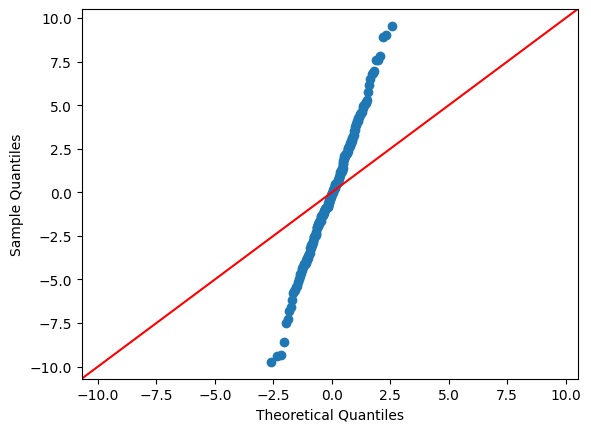

In [84]:
#Plotting the Q-Q plot for residuals
sm.qqplot(final_model.resid, line='45')
plt.show()

___
__Box-Cox Transformation__

Apply the Box-Cox transformation to the dependent variable 'perform'.

This is done to stabilize variance and make the residuals closer to normal distribution

In [153]:
df_long_dist['perform_transformed'], lambda_val = boxcox(df_long_dist['perform'])

#Rebuild the model using the transformed dependent variable
final_model_transformed = smf.ols(formula="perform_transformed ~ x08 + x10 + x14 + x16", data=df_long_dist).fit(cov_type='HC3')
print(final_model_transformed.summary())

                             OLS Regression Results                            
Dep. Variable:     perform_transformed   R-squared:                       0.875
Model:                             OLS   Adj. R-squared:                  0.873
Method:                  Least Squares   F-statistic:                     325.9
Date:                 Thu, 10 Oct 2024   Prob (F-statistic):           3.80e-85
Time:                         01:58:18   Log-Likelihood:                -498.82
No. Observations:                  200   AIC:                             1008.
Df Residuals:                      195   BIC:                             1024.
Df Model:                            4                                         
Covariance Type:                   HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4169      2.402     -3.50

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7372\3813429228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_dist['perform_transformed'], lambda_val = boxcox(df_long_dist['perform'])


___
__Test for Normality of Errors for Transformed Model__

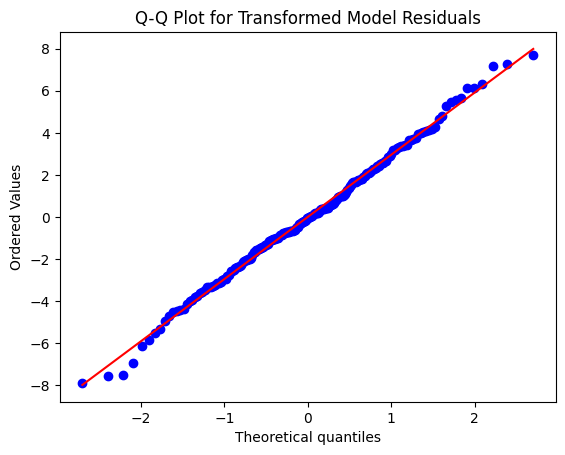

In [154]:
#Plot a Q-Q plot for residuals to visually inspect the normality assumption after the transformation
residuals = final_model_transformed.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Transformed Model Residuals')
plt.show()

The residuals of the transformed model appear to be approximately normally distributed around the 45 degree line. There are a few minor deviations from the line, but they are not severe enough to raise significant concerns about the normality assumption.

H0: Normal errors

H1: Non−normal errors

In [155]:
stat, p = shapiro(final_model_transformed.resid)
print(f'Shapiro-Wilk Test: p-value = {p}')

Shapiro-Wilk Test: p-value = 0.8208760128500547


Since p>alpha, this suggests that we fail to reject the null hypothesis of normality, meaning the residuals are normally distributed. This is further justified by the graphical test.

___
__Graphical Test for Homoskedasticity__

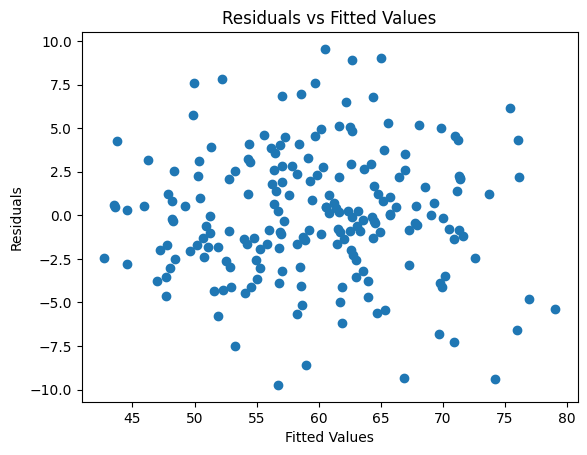

In [157]:
#Plot residuals vs. fitted values
plt.scatter(final_model_transformed.fittedvalues, final_model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

The scatter plot shows no clear pattern or funnel shape, indicating no significant heteroskedasticity.

___
__Formal Test for Homoskedasticity__

H0: Homoskedastic errors

H1: Heteroskedastic errors

In [159]:
spec_white(final_model_transformed.resid, final_model_transformed.model.exog)[1]

np.float64(0.06062075671349634)

In [158]:
_, pval, _, _ = het_breuschpagan(final_model_transformed.resid, final_model_transformed.model.exog)
print(f'Breusch-Pagan Test: p-value = {pval}')

Breusch-Pagan Test: p-value = 0.011734811944405604


We conducted two statistical tests for heteroscedasticity:

The Breusch-Pagan test yielded a p-value of 0.0117, which would typically suggest the presence of heteroscedasticity.

However, the more general White's test gave a p-value of 0.0606, just above the conventional 0.05 significance level.

These somewhat conflicting results, combined with the visual inspection, suggest that while there may be some mild heteroscedasticity remaining, it's not severe enough to invalidate our model.

___
__Multicollinearity (Variance Inflation Factor)__

In [162]:
X = df_long_dist[['x08', 'x10', 'x14', 'x16']]
#Add an intercept term to the predictors DataFrame
X = sm.add_constant(X)
#Calculate VIF to check for multicollinearity among predictors
#VIF values > 10 indicate high multicollinearity that needs to be addressed
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])]
print(vif)

  Variable         VIF
0    const  143.370627
1      x08    1.003234
2      x10    1.008242
3      x14    1.008613
4      x16    1.013635


VIF values for predictors (x08, x10, x14, and x16) are all well below the threshold of 5, indicating that multicollinearity is not a concern.

The intercept (const) has a high VIF value, which is typical and does not indicate multicollinearity issues because it does not directly impact the interpretation of the relationship between the independent variables.

___
__Check for Influential Data Points (Cook's D)__


In [163]:
#Get influence measures from the fitted model
influence = final_model_transformed.get_influence()
#Cook's distance values
cooks_d = influence.cooks_distance[0]

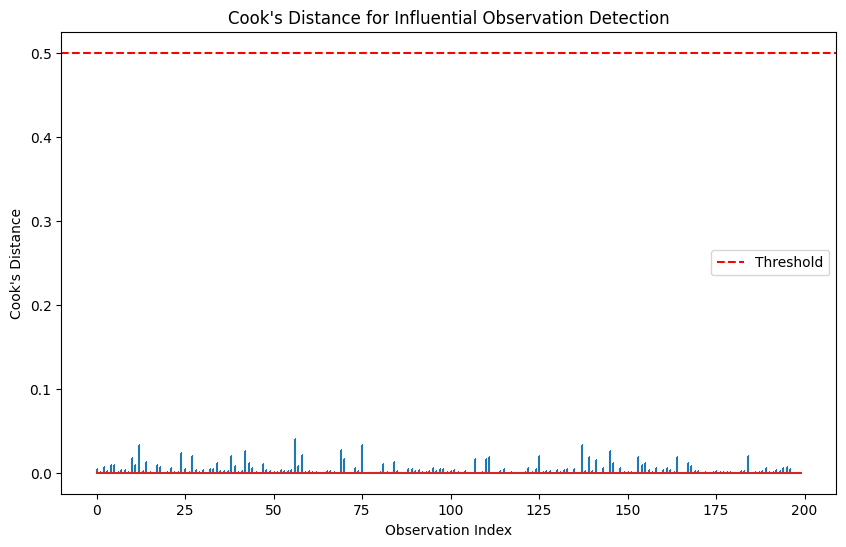

In [187]:
#Plot Cook's distance to identify influential points
plt.figure(figsize=(10, 6))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.title('Cook\'s Distance for Influential Observation Detection')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.legend()
plt.show()

This plot suggests that there are no data points with a strong influence on the regression results, which is generally a good sign in terms of model stability.


___
__Check for Influential Data Points (Leverage vs. Standardized Residuals)__

In [188]:
#Extract leverage values and studentized residuals
leverage = influence.hat_matrix_diag

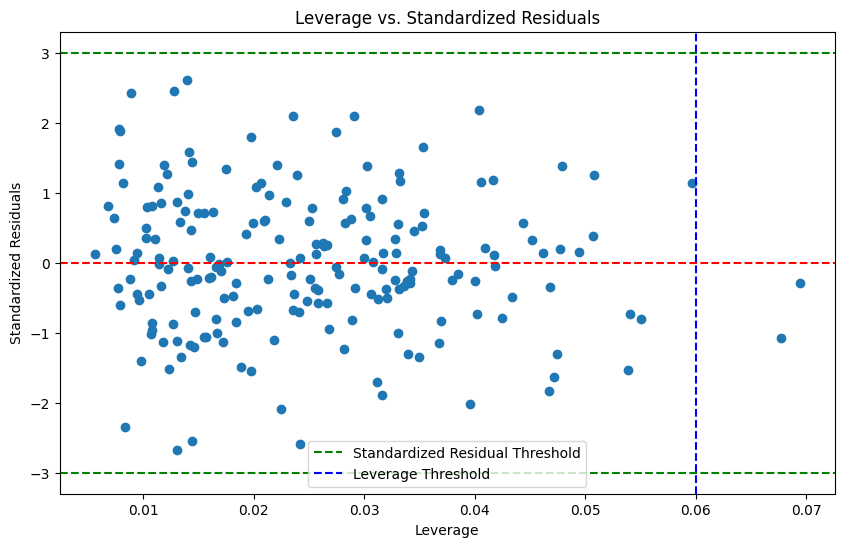

In [189]:
#Plot leverage values against standardized residuals
plt.figure(figsize=(10, 6))
plt.scatter(leverage, influence.resid_studentized_internal)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='g', linestyle='--', label='Standardized Residual Threshold')
plt.axhline(y=-3, color='g', linestyle='--')
plt.axvline(x=2 * (len(X.columns) + 1) / len(X), color='b', linestyle='--', label='Leverage Threshold')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage vs. Standardized Residuals')
plt.legend()
plt.show()

The plot suggests that the regression model does not have problematic influential points. There are no extreme outliers in terms of standardized residuals, and none of the points have excessively high leverage. This indicates that the model is likely stable and not overly influenced by any single observation or a group of observations.


___
__Identification of Influential Observations (DFFITS) and Final Model__

In [191]:
#Calculate DFFITS
dffits_values = influence.dffits[0]
#Identify and list influential observations based on DFFITS
influential_points = [i for i, dffit in enumerate(dffits_values) if abs(dffit) > 2 * (len(X.columns) / len(X)) ** 0.5]
print("Influential observations based on DFFITS:", influential_points)

Influential observations based on DFFITS: [12, 24, 27, 42, 56, 58, 69, 75, 125, 137, 145, 184]


In [171]:
#Remove influential data points based on DFFITS values that significantly affect model prediction
df_long_dist_cleaned = df_long_dist.drop(df_long_dist.index[influential_points])
#Refit the model using the cleaned dataset and compare its performance to the original model
final_model_cleaned = smf.ols(formula="perform_transformed ~ x08 + x10 + x14 + x16", data=df_long_dist_cleaned).fit()
print(final_model_cleaned.summary())

                             OLS Regression Results                            
Dep. Variable:     perform_transformed   R-squared:                       0.895
Model:                             OLS   Adj. R-squared:                  0.893
Method:                  Least Squares   F-statistic:                     390.4
Date:                 Thu, 10 Oct 2024   Prob (F-statistic):           2.10e-88
Time:                         01:58:19   Log-Likelihood:                -448.88
No. Observations:                  188   AIC:                             907.8
Df Residuals:                      183   BIC:                             923.9
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5907      2.365     -4.05

In [183]:
example_values = {'x08': 45, 'x10': 40, 'x14': 50, 'x16': 60}
example_df = pd.DataFrame([example_values])

transformed_prediction = final_model_transformed.predict(example_df)[0]
original_prediction = inv_boxcox(transformed_prediction, lambda_val)

print(f"Transformed Performance Prediction: {transformed_prediction:.4f}")
print(f"Original Performance Prediction: {original_prediction:.4f}")

Transformed Performance Prediction: 79.9909
Original Performance Prediction: 96.7151


In [184]:
# Increase the tolerance level to 10 to find more similar athletes
def find_similar_athletes(df, example_values, tolerance=10):
    # Calculate the absolute difference for each variable between the dataset values and the example values
    conditions = (
        (np.abs(df['x08'] - example_values['x08']) <= tolerance) &
        (np.abs(df['x10'] - example_values['x10']) <= tolerance) &
        (np.abs(df['x14'] - example_values['x14']) <= tolerance) &
        (np.abs(df['x16'] - example_values['x16']) <= tolerance)
    )
    return df[conditions]

# Find athletes in the dataset with similar scores to the example values using a higher tolerance
similar_athletes = find_similar_athletes(df_long_dist, example_values, tolerance=10)

# Display the actual performance of these similar athletes
print("Athletes with similar scores:")
print(similar_athletes[['perform', 'x08', 'x10', 'x14', 'x16']])

# Calculate the average performance of these similar athletes for comparison
average_performance = similar_athletes['perform'].mean()
print(f"\nAverage Performance of Similar Athletes: {average_performance:.2f}")
print(f"Original Performance Prediction: {original_prediction:.2f}")


Athletes with similar scores:
     perform  x08  x10  x14  x16
600       81   40   31   47   53
614       88   44   47   45   58
625       87   43   43   42   50
627       97   43   44   51   55
666       88   49   39   47   50
672       84   41   43   40   54
675       80   42   37   44   57
699       85   41   47   52   51
732       80   39   43   43   53
757       88   45   45   44   52

Average Performance of Similar Athletes: 85.80
Original Performance Prediction: 96.72


The close alignment of observation 627's actual performance with the model's prediction indicates that the model effectively captures the performance characteristics for this athlete. It validates the model's predictive capability, at least for cases where the predictor values resemble those of observation 627.
___